<a href="https://colab.research.google.com/github/Tran-Truong-Phuoc/TTPBTL/blob/main/Chuy%E1%BB%83n_%C4%91%E1%BB%95i_s%E1%BB%91_data_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

Đọc df và làm sạch dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Đọc file CSV
data = pd.read_csv('household_power_consumption.txt')
print(data.head())
# Hiển thị DataFrame ban đầu
print("DataFrame ban đầu:")
print(data)
# Kiểm tra giá trị thiếu
print(data.isnull().sum())

# Bước 1: Loại bỏ hàng có giá trị thiếu
data_cleaned = data.dropna()

# Bước 2: Loại bỏ hàng trùng lặp
data_cleaned = data_cleaned.drop_duplicates()

# Hiển thị DataFrame đã làm sạch
print("\nDataFrame đã làm sạch:")
print(data_cleaned)

# Giả sử file chứa dữ liệu dạng bảng
data = pd.read_csv('household_power_consumption.txt', delimiter=';')  # Hoặc sử dụng delimiter khác nếu cần
print(data.head())



  Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0  16/12/2006;17:24:00;4.216;0.418;234.840;18.400...                                                                       
1  16/12/2006;17:25:00;5.360;0.436;233.630;23.000...                                                                       
2  16/12/2006;17:26:00;5.374;0.498;233.290;23.000...                                                                       
3  16/12/2006;17:27:00;5.388;0.502;233.740;23.000...                                                                       
4  16/12/2006;17:28:00;3.666;0.528;235.680;15.800...                                                                       
DataFrame ban đầu:
        Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0        16/12/2006;17:24:00;4.216;0.418;234.840;18.400...                                                 

<ipython-input-3-cc42418e5b8a>:23: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('household_power_consumption.txt', delimiter=';')  # Hoặc sử dụng delimiter khác nếu cần


Tính các thông số như trung bình, trung vị, độ lệch chuẩn cho các biến số như Global_active_power, Voltage, Global_intensity, và các Sub_metering.

In [ ]:
# Danh sách các biến số cần tính toán
variables = ['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Tính toán các thông số
results = {}

for var in variables:
    # Convert the column to numeric, handling errors by coercing to NaN
    data[var] = pd.to_numeric(data[var], errors='coerce')

    results[var] = {
        'Mean': data[var].mean(),
        'Median': data[var].median(),
        'Standard Deviation': data[var].std()
    }

# Hiển thị kết quả
results_df = pd.DataFrame(results).T
print(results_df)

                           Mean   Median  Standard Deviation
Global_active_power    1.091615    0.602            1.057294
Voltage              240.839858  241.010            3.239987
Global_intensity       4.627759    2.600            4.444396
Sub_metering_1         1.121923    0.000            6.153031
Sub_metering_2         1.298520    0.000            5.822026
Sub_metering_3         6.458447    1.000            8.437154


Vẽ biểu đồ để xem xu hướng của Global_active_power, Global_reactive_power, và Voltage theo thời gian.

<ipython-input-5-2c23440c2cdf>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


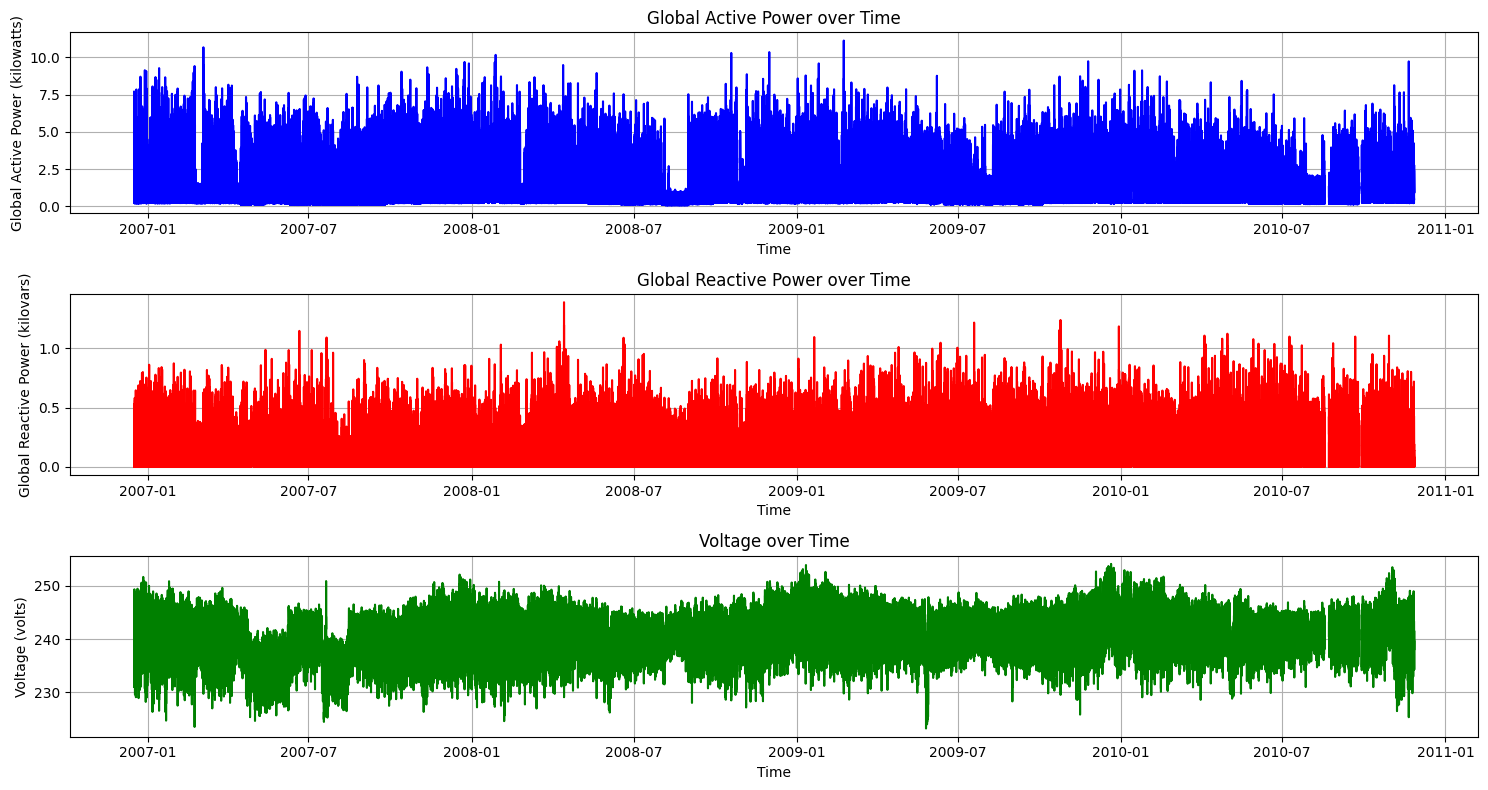

In [ ]:
# Tạo cột 'DateTime' bằng cách kết hợp 'Date' và 'Time'
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Thiết lập cột thời gian là chỉ mục
data.set_index('DateTime', inplace=True)

# Ensure 'Global_reactive_power' is numeric
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ Global_active_power
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Global_active_power'], label='Global Active Power', color='blue')
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid()

# Vẽ Global_reactive_power
plt.subplot(3, 1, 2)
# Convert 'Global_reactive_power' to string if it contains non-numeric values
#data['Global_reactive_power'] = data['Global_reactive_power'].astype(str)
plt.plot(data.index, data['Global_reactive_power'], label='Global Reactive Power', color='red')
plt.title('Global Reactive Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Reactive Power (kilovars)')
plt.grid()

# Vẽ Voltage
plt.subplot(3, 1, 3)
plt.plot(data.index, data['Voltage'], label='Voltage', color='green')
plt.title('Voltage over Time')
plt.xlabel('Time')
plt.ylabel('Voltage (volts)')
plt.grid()

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
# Chọn biến cần dự đoán (ví dụ: Global_active_power)
from statsmodels.tsa.stattools import adfuller
import numpy as np # Import numpy library

# Chọn biến cần dự đoán (ví dụ: Global_active_power)
ts = data['Global_active_power']

# Ensure 'ts' is numeric and replace inf/NaN with mean
ts = pd.to_numeric(ts, errors='coerce')
ts = ts.fillna(ts.mean())  # Replace NaN with the mean
ts = ts.replace([np.inf, -np.inf], ts.mean())  # Replace inf with the mean

result = adfuller(ts)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(ts)
plot_pacf(ts)
plt.show()
from statsmodels.tsa.arima.model import ARIMA

# Giả sử bạn đã xác định p, d, q
p, d, q = 1, 1, 1  # Thay đổi giá trị tùy thuộc vào phân tích ACF/PACF
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()

# Xem tóm tắt mô hình
print(model_fit.summary())
# Dự đoán cho 10 bước tiếp theo
forecast = model_fit.forecast(steps=10)
print(forecast)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit mô hình Holt-Winters
model_hw = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)  # Điều chỉnh seasonal_periods theo dữ liệu của bạn
model_hw_fit = model_hw.fit()

# Dự đoán cho 10 bước tiếp theo
forecast_hw = model_hw_fit.forecast(steps=10)
print(forecast_hw)
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Historical Data')
plt.plot(forecast.index, forecast, label='ARIMA Forecast', color='orange')
plt.plot(forecast_hw.index, forecast_hw, label='Holt-Winters Forecast', color='green')
plt.title('Electricity Consumption Forecast')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

NameError: name 'data' is not defined

Tạo đồ thị phân tán để xem mối quan hệ giữa Global_active_power và các biến khác như Voltage và Global_intensity.

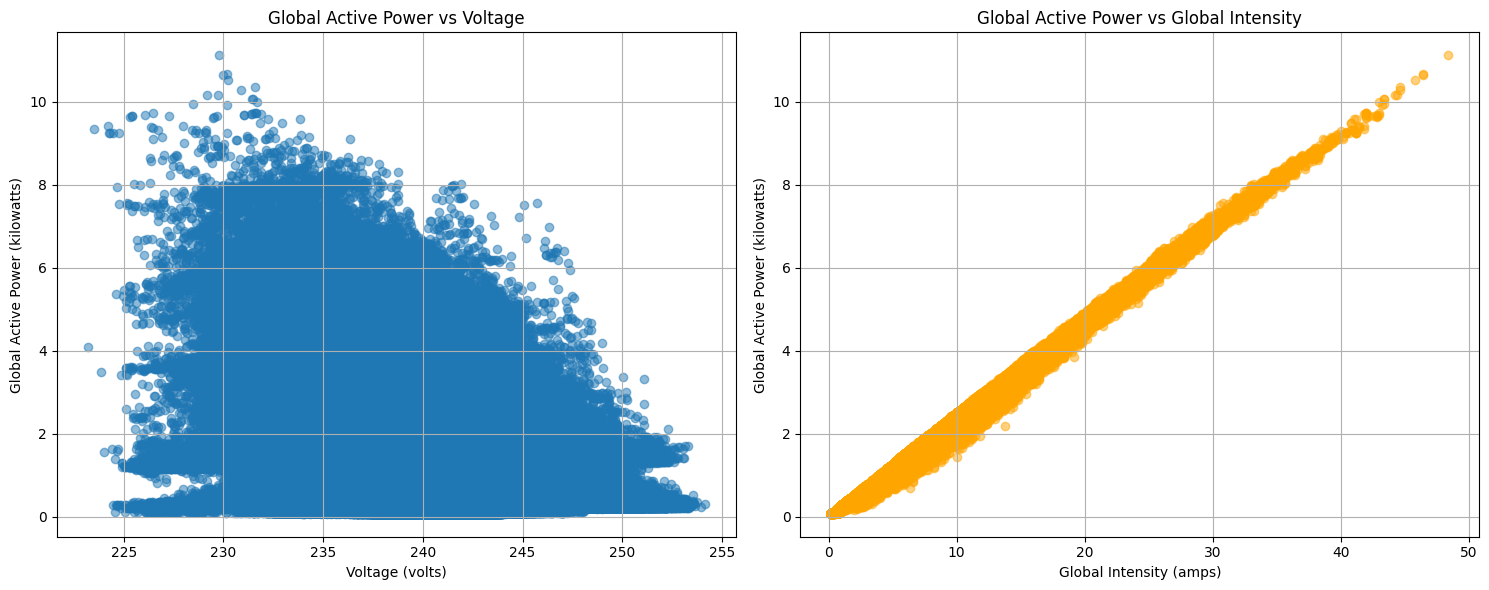

In [ ]:
# Thiết lập kích thước của đồ thị
plt.figure(figsize=(15, 6))

# Đồ thị phân tán giữa Global_active_power và Voltage
plt.subplot(1, 2, 1)
plt.scatter(data['Voltage'], data['Global_active_power'], alpha=0.5)
plt.title('Global Active Power vs Voltage')
plt.xlabel('Voltage (volts)')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid()

# Đồ thị phân tán giữa Global_active_power và Global_intensity
plt.subplot(1, 2, 2)
plt.scatter(data['Global_intensity'], data['Global_active_power'], alpha=0.5, color='orange')
plt.title('Global Active Power vs Global Intensity')
plt.xlabel('Global Intensity (amps)')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid()

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

Tính toán hệ số tương quan giữa các biến để hiểu mối liên hệ giữa chúng.

                     Global_active_power   Voltage  Global_intensity  \
Global_active_power             1.000000 -0.399762          0.998889   
Voltage                        -0.399762  1.000000         -0.411363   
Global_intensity                0.998889 -0.411363          1.000000   
Sub_metering_1                  0.484401 -0.195976          0.489298   
Sub_metering_2                  0.434569 -0.167405          0.440347   
Sub_metering_3                  0.638555 -0.268172          0.626543   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  
Global_active_power        0.484401        0.434569        0.638555  
Voltage                   -0.195976       -0.167405       -0.268172  
Global_intensity           0.489298        0.440347        0.626543  
Sub_metering_1             1.000000        0.054721        0.102571  
Sub_metering_2             0.054721        1.000000        0.080872  
Sub_metering_3             0.102571        0.080872        1.000000  


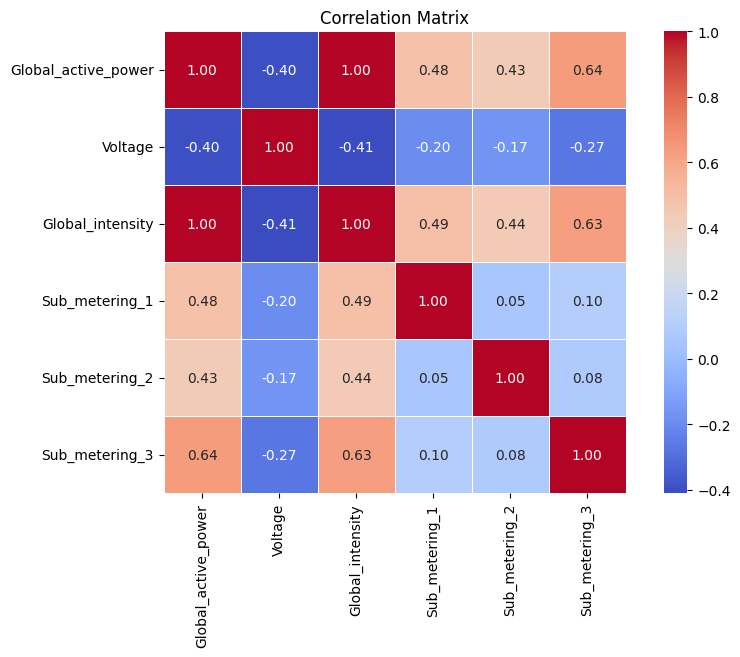

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = data[['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

# Hiển thị ma trận tương quan
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Phân tích số liệu từ Sub_metering_1, Sub_metering_2, và Sub_metering_3 để xác định khu vực tiêu thụ điện nhiều nhất.

Sub_metering_1     2299135.0
Sub_metering_2     2661031.0
Sub_metering_3    13235167.0
dtype: float64
Khu vực tiêu thụ điện nhiều nhất là: Sub_metering_3 với tổng tiêu thụ là: 13235167.0


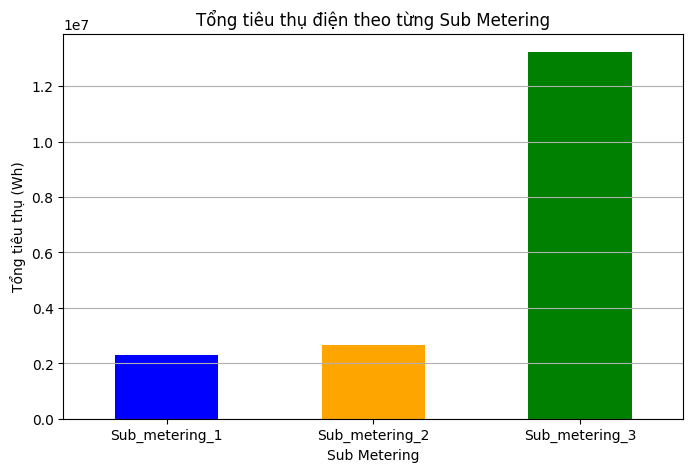

In [ ]:
# Tính tổng cho từng Sub_metering
total_sub_metering = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Hiển thị kết quả
print(total_sub_metering)
# Xác định khu vực tiêu thụ nhiều nhất
max_consumption = total_sub_metering.idxmax()
max_value = total_sub_metering.max()

print(f"Khu vực tiêu thụ điện nhiều nhất là: {max_consumption} với tổng tiêu thụ là: {max_value}")
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
total_sub_metering.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Tổng tiêu thụ điện theo từng Sub Metering')
plt.xlabel('Sub Metering')
plt.ylabel('Tổng tiêu thụ (Wh)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Xác định các khoảng thời gian mà tiêu thụ điện năng đạt đỉnh.

<ipython-input-13-3f7ac8dcf2c7>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_consumption = data.resample('H')['Total_consumption'].sum()


DateTime
2006-12-16 17:00:00     626.0
2006-12-16 18:00:00    1415.0
2006-12-16 19:00:00    1087.0
2006-12-16 20:00:00    1007.0
2006-12-16 21:00:00    1058.0
Freq: h, Name: Total_consumption, dtype: float64
Giá trị tiêu thụ điện tối đa là: 4454.0 kWh tại các thời điểm:
DateTime
2009-01-24 11:00:00    4454.0
Freq: h, Name: Total_consumption, dtype: float64


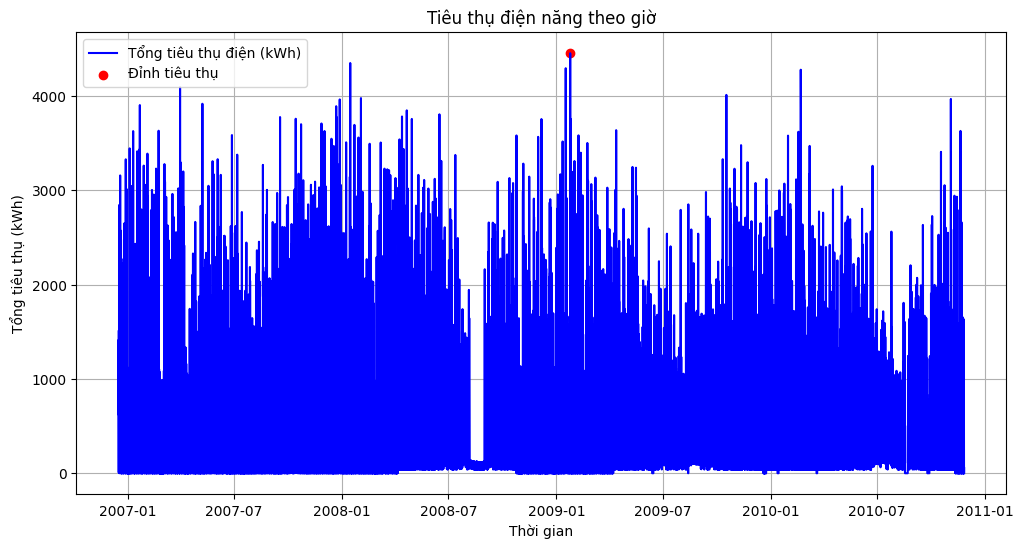

In [ ]:
# Tính tổng tiêu thụ điện theo giờ
data['Total_consumption'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']
hourly_consumption = data.resample('H')['Total_consumption'].sum()

# Hiển thị vài dòng đầu
print(hourly_consumption.head())
# Xác định giá trị tối đa và thời gian tương ứng
peak_value = hourly_consumption.max()
peak_times = hourly_consumption[hourly_consumption == peak_value]

print(f"Giá trị tiêu thụ điện tối đa là: {peak_value} kWh tại các thời điểm:")
print(peak_times)
# Vẽ biểu đồ tiêu thụ điện theo giờ
plt.figure(figsize=(12, 6))
plt.plot(hourly_consumption.index, hourly_consumption, label='Tổng tiêu thụ điện (kWh)', color='blue')

# Đánh dấu các đỉnh tiêu thụ
plt.scatter(peak_times.index, peak_times, color='red', label='Đỉnh tiêu thụ')

plt.title('Tiêu thụ điện năng theo giờ')
plt.xlabel('Thời gian')
plt.ylabel('Tổng tiêu thụ (kWh)')
plt.legend()
plt.grid()
plt.show()

Sử dụng biểu đồ để trực quan hóa lượng tiêu thụ điện theo thời gian cho các Sub_metering

<ipython-input-14-52c4235cfaf3>:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


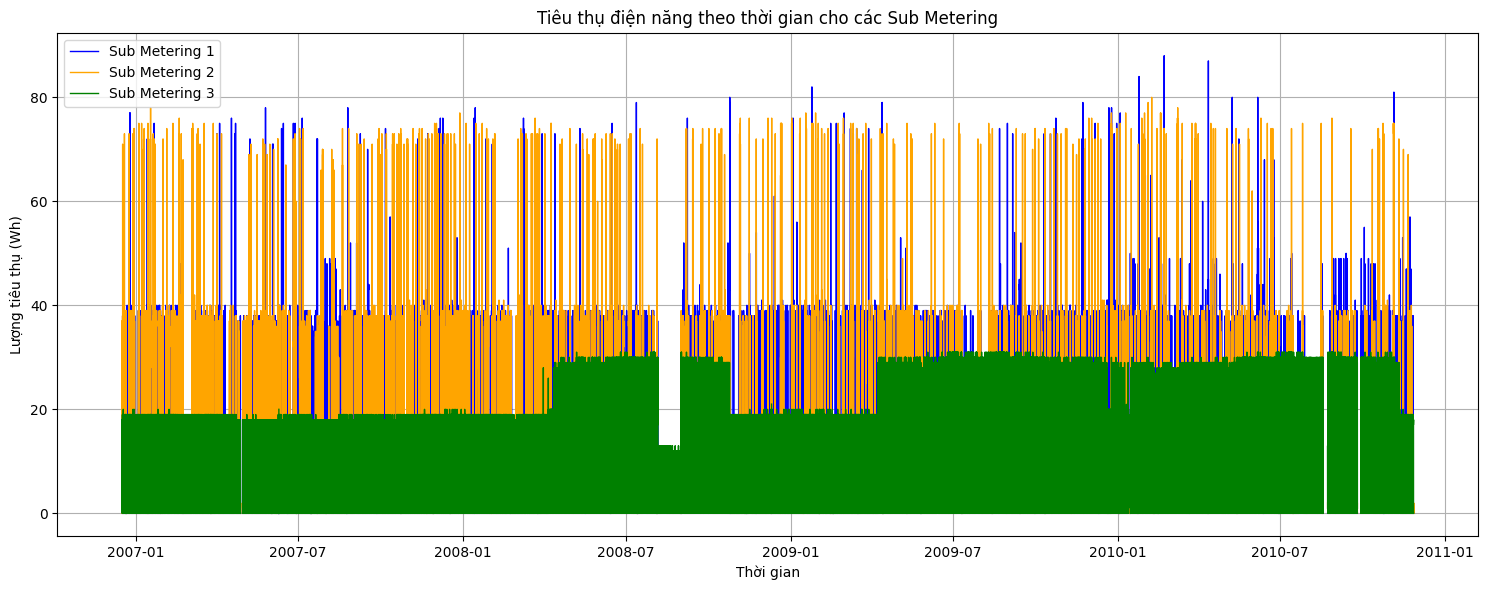

In [ ]:
# Thiết lập kích thước của đồ thị
plt.figure(figsize=(15, 6))

# Vẽ Sub_metering_1
plt.plot(data.index, data['Sub_metering_1'], label='Sub Metering 1', color='blue', linewidth=1)

# Vẽ Sub_metering_2
plt.plot(data.index, data['Sub_metering_2'], label='Sub Metering 2', color='orange', linewidth=1)

# Vẽ Sub_metering_3
plt.plot(data.index, data['Sub_metering_3'], label='Sub Metering 3', color='green', linewidth=1)

# Thêm tiêu đề và nhãn
plt.title('Tiêu thụ điện năng theo thời gian cho các Sub Metering')
plt.xlabel('Thời gian')
plt.ylabel('Lượng tiêu thụ (Wh)')
plt.legend()
plt.grid()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Tạo nhiệt đồ để thể hiện mức tiêu thụ điện trong suốt các ngày trong tuần hoặc theo giờ.

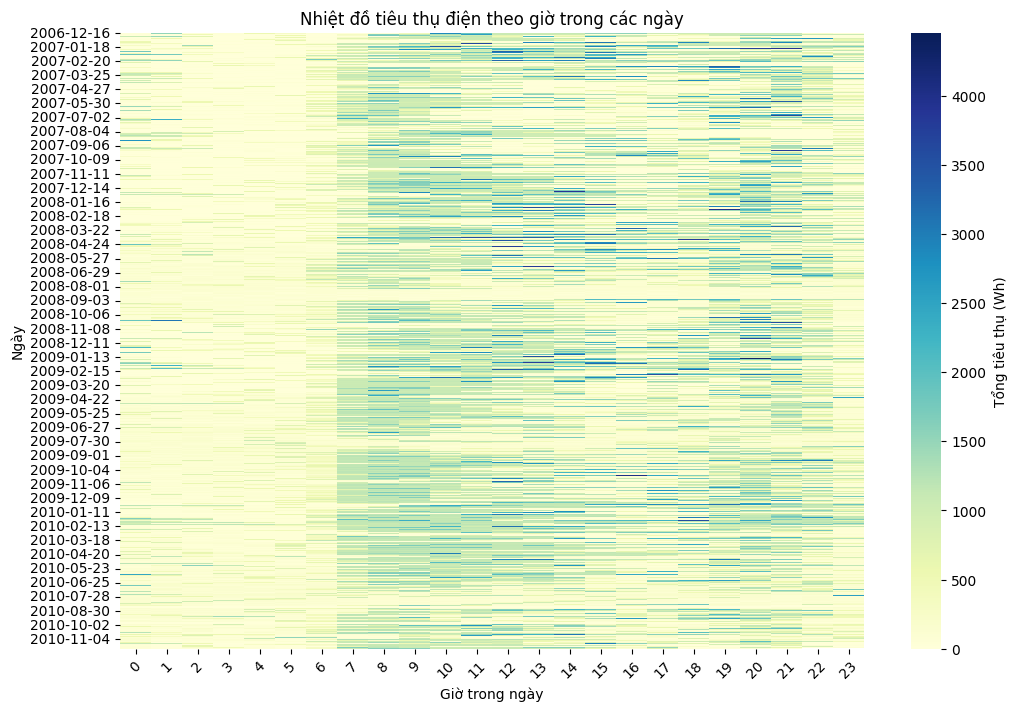

In [ ]:
# Tính tổng tiêu thụ điện cho từng sub-metering
data['Total_consumption'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']

# Tạo cột cho ngày và giờ
data['Date'] = data.index.date
data['Hour'] = data.index.hour

# Tính tổng tiêu thụ theo ngày và giờ
heatmap_data = data.groupby(['Date', 'Hour'])['Total_consumption'].sum().unstack()
# Vẽ nhiệt đồ
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Tổng tiêu thụ (Wh)'})

# Thêm tiêu đề và nhãn
plt.title('Nhiệt đồ tiêu thụ điện theo giờ trong các ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Ngày')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Hiển thị biểu đồ
plt.show()

Dự đoán tiêu thụ: Sử dụng các mô hình học máy (như hồi quy tuyến tính, random forest) để dự đoán tiêu thụ điện năng trong tương lai dựa trên các biến số hiện có.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Xóa các hàng có bất kỳ giá trị nào bị thiếu trong các tính năng hoặc mục tiêu
data.dropna(subset=features.columns.tolist() + [target.name], inplace=True)

# Recalculate Total_consumption after dropping rows
data['Total_consumption'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']

# Chọn các biến số đầu vào
features = data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
target = data['Total_consumption']
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo và huấn luyện mô hình hồi quy tuyến tính
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_linear = linear_model.predict(X_test)

# Đánh giá mô hình
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Hồi quy tuyến tính - MSE: {mse_linear}, R^2: {r2_linear}')

# Tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R^2: {r2_rf}')

Hồi quy tuyến tính - MSE: 5.717365743175133e-28, R^2: 1.0
Random Forest - MSE: 0.007160808430277953, R^2: 0.9999570403805053


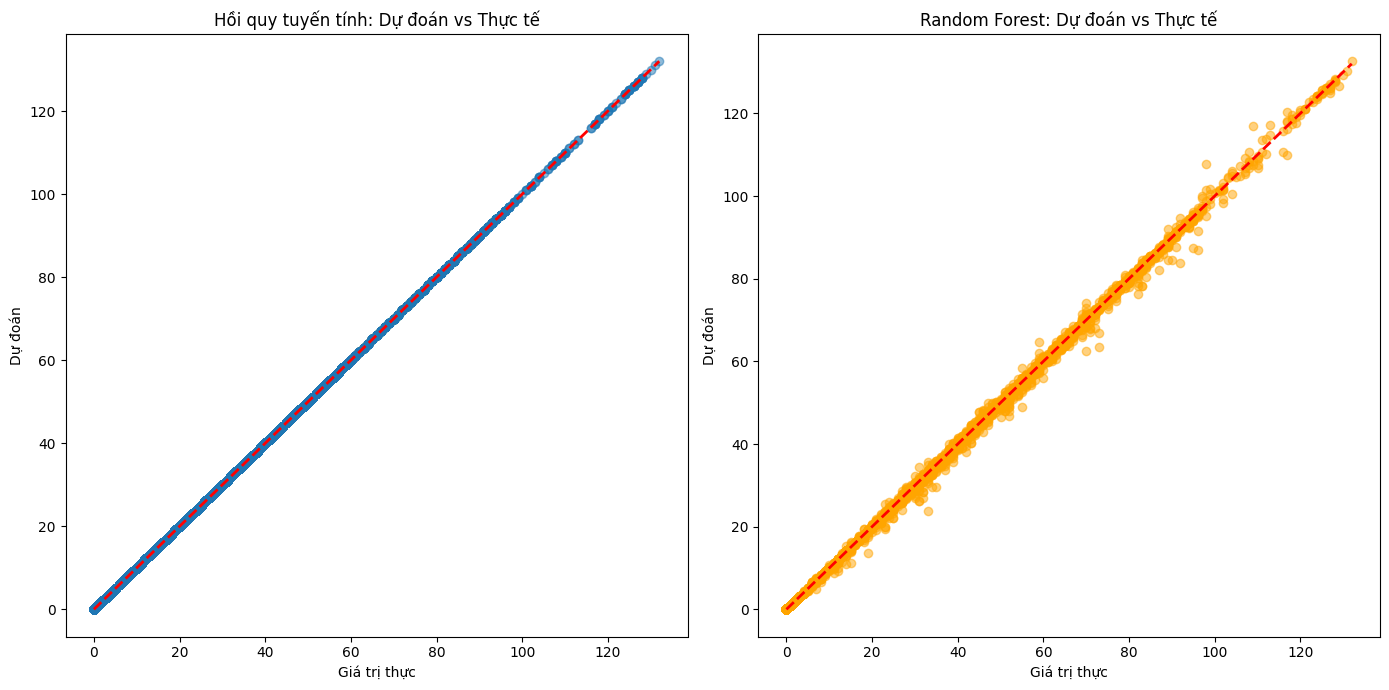

In [ ]:
# Vẽ biểu đồ so sánh dự đoán và giá trị thực
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Hồi quy tuyến tính: Dự đoán vs Thực tế')
plt.xlabel('Giá trị thực')
plt.ylabel('Dự đoán')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Dự đoán vs Thực tế')
plt.xlabel('Giá trị thực')
plt.ylabel('Dự đoán')

plt.tight_layout()
plt.show()